In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\\Users\\dionisio.rodriguez\\Downloads\\drive-download-20241111T183916Z-001\\all-weeks-countries.xlsx"


# Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_excel(file_path)
df.head()

c:\Users\dionisio.rodriguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2024-10-27,Films,1,Don't Move,NaN,1
1,Argentina,AR,2024-10-27,Films,2,Justice,NaN,2
2,Argentina,AR,2024-10-27,Films,3,Family Pack,NaN,1
3,Argentina,AR,2024-10-27,Films,4,The Shadow Strays,NaN,2
4,Argentina,AR,2024-10-27,Films,5,Lonely Planet,NaN,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324340 entries, 0 to 324339
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country_name                324340 non-null  object
 1   country_iso2                324340 non-null  object
 2   week                        324340 non-null  object
 3   category                    324340 non-null  object
 4   weekly_rank                 324340 non-null  int64 
 5   show_title                  324340 non-null  object
 6   season_title                158421 non-null  object
 7   cumulative_weeks_in_top_10  324340 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 19.8+ MB


En total tenemos 324.340 registros.

Sólo en la columna "season_title" tenemos valores nulos.

In [5]:
df.isnull().sum()

country_name                       0
country_iso2                       0
week                               0
category                           0
weekly_rank                        0
show_title                         0
season_title                  165919
cumulative_weeks_in_top_10         0
dtype: int64

Creamos una función para analizar cada columna

In [6]:
def analizar_columna(df, nombre_columna):
    # Valores distintos
    num_valores_distintos = df[nombre_columna].nunique()
    print(f"Número de valores distintos en '{nombre_columna}':", num_valores_distintos)

    # Frecuencia de cada valor
    frecuencia_valores = df[nombre_columna].value_counts()
    print(f"\nFrecuencia de cada valor en '{nombre_columna}':")
    print(frecuencia_valores)

    return num_valores_distintos, frecuencia_valores

### Country

Cuántos países distintos aparecen, y cuántas veces cada uno?

In [7]:
num_distintos, frecuencia = analizar_columna(df, 'country_name')

Número de valores distintos en 'country_name': 94

Frecuencia de cada valor en 'country_name':
country_name
Argentina     3480
Norway        3480
Qatar         3480
Portugal      3480
Poland        3480
              ... 
Guatemala     3480
Guadeloupe    3480
Greece        3480
Germany       3480
Russia         700
Name: count, Length: 94, dtype: int64


Gráficamente

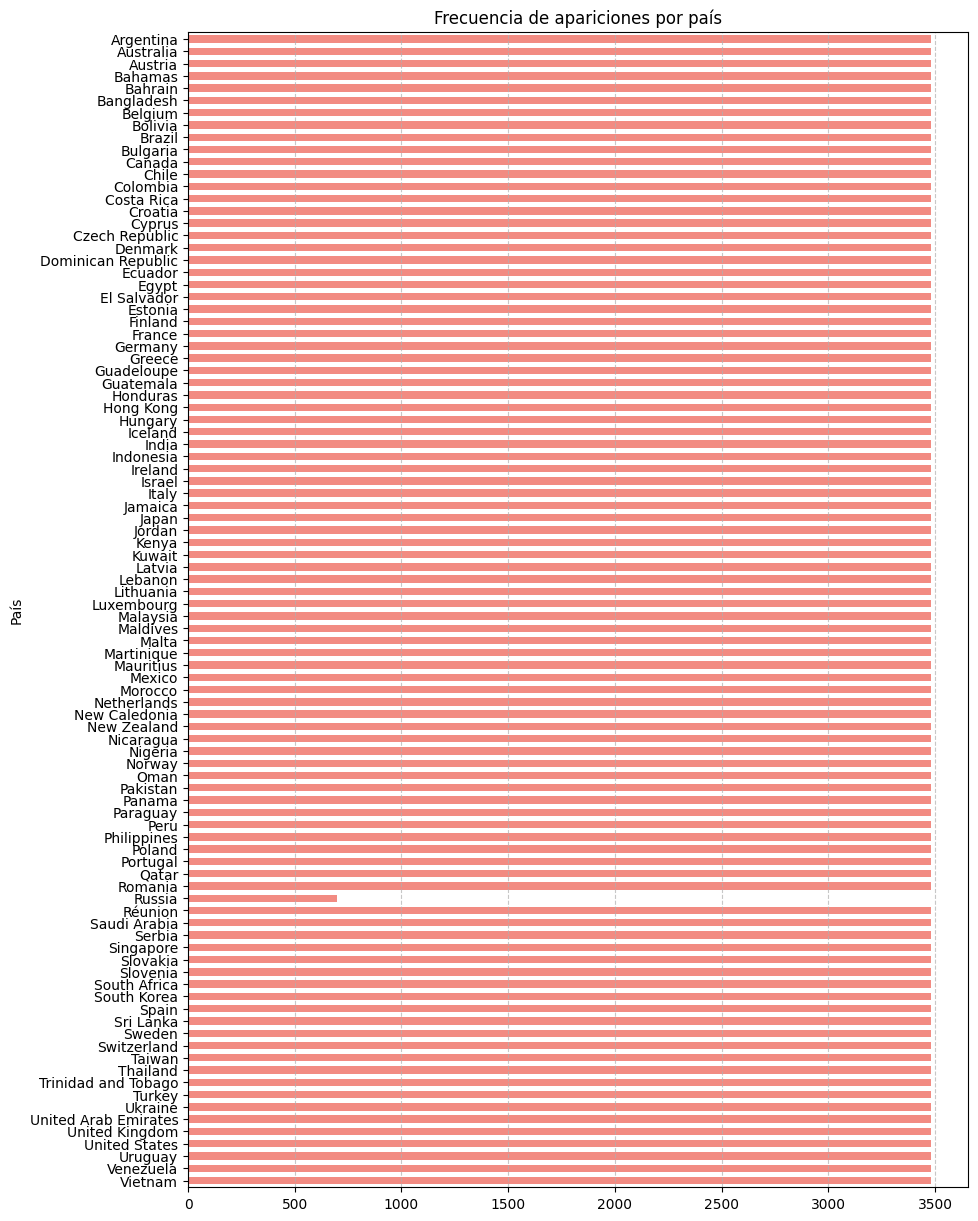

In [8]:
# Ordeno alfabéticamente
frecuencia_paises = df['country_name'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(12, 15))

frecuencia_paises.plot(kind='barh', color='#F28B82', width=0.6)

# Etiquetas de países
plt.gca().set_yticks(range(len(frecuencia_paises)))
plt.gca().set_yticklabels(frecuencia_paises.index, ha='right')

# Espaciado entre barras
plt.subplots_adjust(left=0.25)  # Ajustar margen izquierdo para que los nombres se vean claramente

plt.title('Frecuencia de apariciones por país')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Tenemos 93 países que se repiten 3.480 veces cada uno. Sólo Russia aparece menos veces. Lo borramos.

In [9]:
df = df[df['country_name'] != 'Russia']

### Week

Cuántas semanas hay? cuál es la primer y última semana que analizamos?

In [10]:
num_distintos, frecuencia = analizar_columna(df, 'week')

Número de valores distintos en 'week': 174

Frecuencia de cada valor en 'week':
week
2024-10-27    1860
2022-07-17    1860
2022-09-11    1860
2022-09-04    1860
2022-08-28    1860
              ... 
2023-09-10    1860
2023-09-03    1860
2023-08-27    1860
2023-08-20    1860
2021-07-04    1860
Name: count, Length: 174, dtype: int64


In [11]:
df['week'] = pd.to_datetime(df['week'], errors='coerce').dt.date

fecha_mas_antigua = df['week'].min()
fecha_mas_reciente = df['week'].max()

print("Fecha más antigua:", fecha_mas_antigua)
print("Fecha más reciente:", fecha_mas_reciente)

Fecha más antigua: 2021-07-04
Fecha más reciente: 2024-10-27


Tenemos 174 semanas distintas, la primera en Julio de 2021 y la última en Octubre de 2024

### Category

In [12]:
num_distintos, frecuencia = analizar_columna(df, 'category')

Número de valores distintos en 'category': 2

Frecuencia de cada valor en 'category':
category
Films    161820
TV       161820
Name: count, dtype: int64


In [13]:
def histograma(df, columna):
    frecuencia = df[columna].value_counts()

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    ax = frecuencia.plot(kind='bar', color='#F28B82')

    # Etiquetas en las barras
    for i, v in enumerate(frecuencia):
        ax.text(i, v - 0.1, str(v), ha='center', color='black', fontsize=10)

    plt.title(f'Frecuencia de {columna}')
    plt.xticks(rotation=0, ha='right')
    plt.tight_layout()
    plt.show()

    return frecuencia

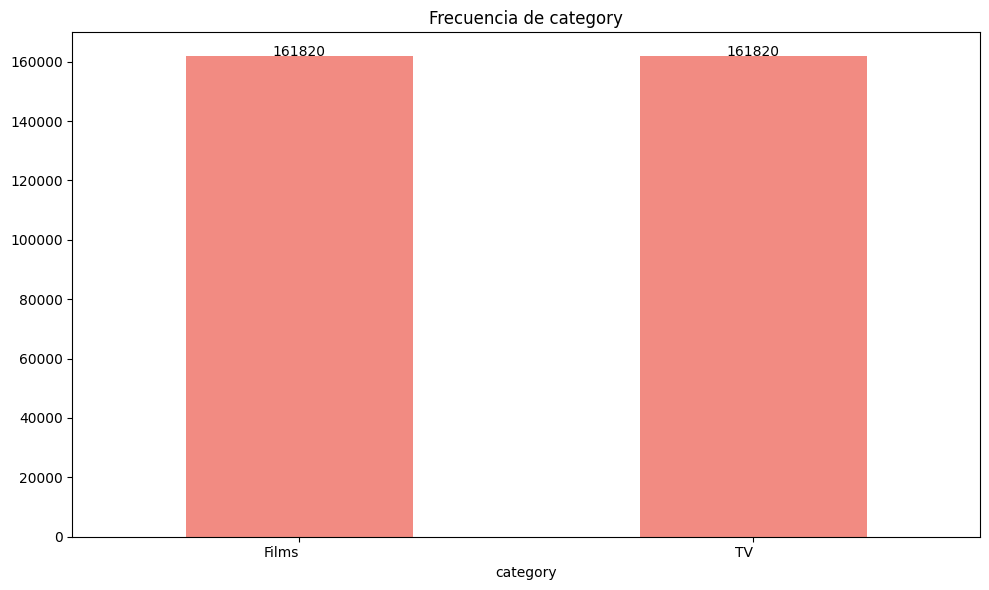

category
Films    161820
TV       161820
Name: count, dtype: int64

In [14]:
histograma(df, 'category')

Tenemos sólo dos categorías, películas y series, con la misma cantidad de repeticiones.

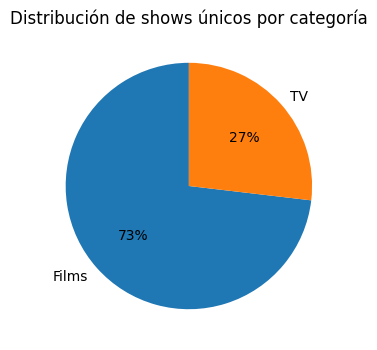

In [16]:
unique_shows_per_category = df.groupby('category')['show_title'].nunique()

plt.figure(figsize=(4, 4))
plt.pie(unique_shows_per_category, labels=unique_shows_per_category.index, autopct='%1.f%%', startangle=90)
plt.title("Distribución de shows únicos por categoría")
plt.show()

También vemos que en la categoría Series se encuentra concentrada en pocos títulos, mientras que la categoría Película está mucho más atomizada.

### Show title

In [17]:
num_distintos, frecuencia = analizar_columna(df, 'show_title')

Número de valores distintos en 'show_title': 8293

Frecuencia de cada valor en 'show_title':
show_title
Stranger Things         3258
Manifest                2912
Bridgerton              2912
The Good Doctor         2148
Emily in Paris          1810
                        ... 
Dirty Dancing              1
Pitch Perfect 2            1
Jerry Maguire              1
A Nice Girl Like You       1
The Fiery Priest           1
Name: count, Length: 8293, dtype: int64


En total hay 8293 títulos distintos, y los que más veces se repiten son Stranger Things, Manifest y Bridgerton

In [18]:
#!pip install wordcloud

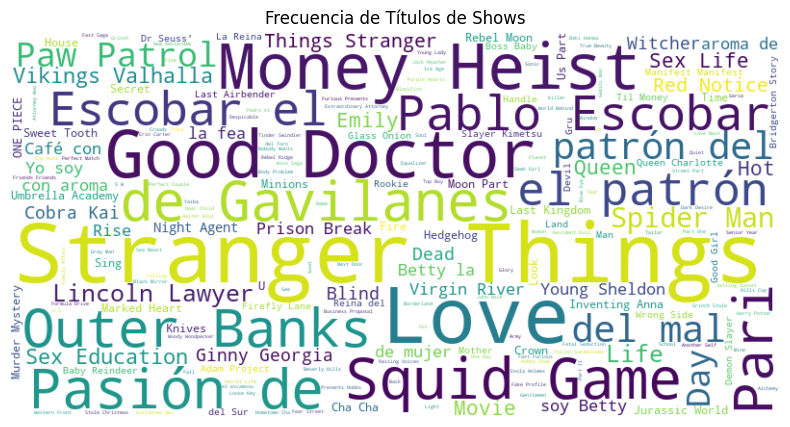

In [19]:
from wordcloud import WordCloud

text = ' '.join(df['show_title'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frecuencia de Títulos de Shows')
plt.show()


Veamos un boxplot con los títulos y su cantidad de ocurrencias

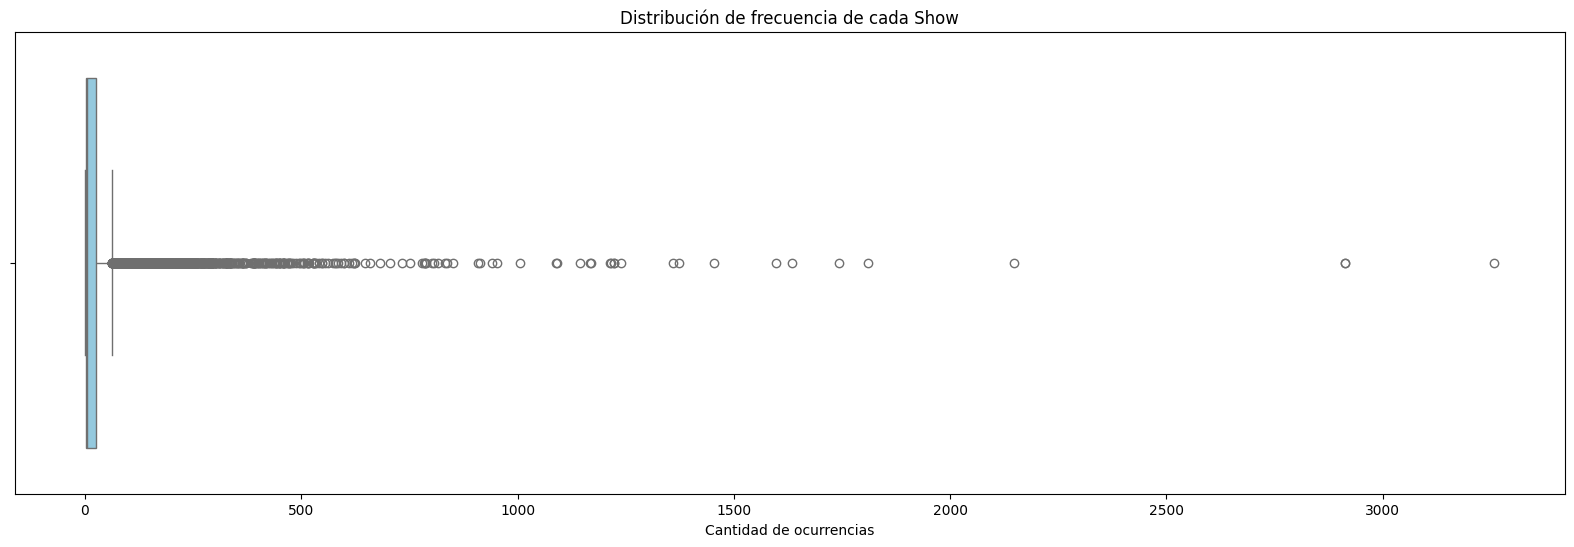

In [20]:
df_counts = df.groupby('show_title').size().reset_index(name='count')

plt.figure(figsize=(20, 6))
sns.boxplot(x=df_counts['count'], color="skyblue")
plt.title('Distribución de frecuencia de cada Show')
plt.xlabel('Cantidad de ocurrencias')
plt.show()

In [21]:
df_counts.describe().round(1)

,count
count,8293.0
mean,39.0
std,119.3
min,1.0
25%,2.0
50%,6.0
75%,26.0
max,3258.0


Vemos que de los 8293 títulos, la media de apariciones en algún top 10 es 39, con un máximo de 3258. Hay muchísimos outliers.

Ahora un boxplot con los títulos y su máxima cantidad de semanas en el top 10

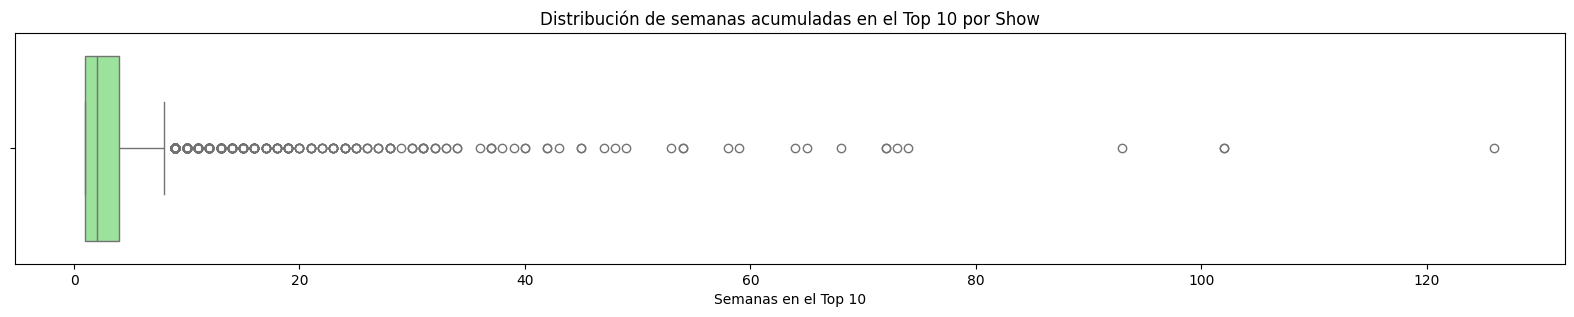

In [22]:
df_max_weeks = df.groupby('show_title')['cumulative_weeks_in_top_10'].max().reset_index()

plt.figure(figsize=(20, 3))
sns.boxplot(x=df_max_weeks['cumulative_weeks_in_top_10'], color="lightgreen")
plt.title('Distribución de semanas acumuladas en el Top 10 por Show')
plt.xlabel('Semanas en el Top 10')
plt.show()

In [23]:
df_max_weeks.describe().round(1)

,cumulative_weeks_in_top_10
count,8293.0
mean,3.5
std,4.9
min,1.0
25%,1.0
50%,2.0
75%,4.0
max,126.0


Vemos que de los 8293 títulos, la media son 3,5 semanas en el top 10. Hay muchos outliers.

### Season title

In [24]:
num_distintos, frecuencia = analizar_columna(df, 'season_title')

Número de valores distintos en 'season_title': 2874

Frecuencia de cada valor en 'season_title':
season_title
Pablo Escobar, el patrón del mal: Season 1    1359
Stranger Things 4                             1241
Wednesday: Season 1                           1217
Squid Game: Season 1                          1214
Pasión de Gavilanes: Season 1                 1182
                                              ... 
Peaky Blinders: Season 2                         1
Takki: Season 2                                  1
I Cesaroni: Season 1                             1
Marvel's The Punisher: Season 1                  1
Strongest Deliveryman: Season 1                  1
Name: count, Length: 2874, dtype: int64


### Cumulative weeks in top 10

In [25]:
num_distintos, frecuencia = analizar_columna(df, 'cumulative_weeks_in_top_10')

Número de valores distintos en 'cumulative_weeks_in_top_10': 126

Frecuencia de cada valor en 'cumulative_weeks_in_top_10':
cumulative_weeks_in_top_10
1      124795
2       80600
3       42080
4       23489
5       14196
        ...  
123         1
124         1
125         1
126         1
103         1
Name: count, Length: 126, dtype: int64


In [26]:
min_weeks = df['cumulative_weeks_in_top_10'].min()
max_weeks = df['cumulative_weeks_in_top_10'].max()

print("Menor cantidad de semanas en top 10:", min_weeks)
print("Mayor cantidad de semanas en top 10:", max_weeks)

Menor cantidad de semanas en top 10: 1
Mayor cantidad de semanas en top 10: 126


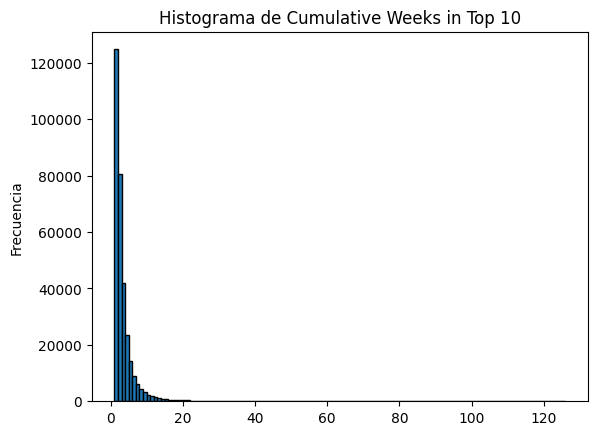

In [27]:
plt.hist(df['cumulative_weeks_in_top_10'], bins=len(df['cumulative_weeks_in_top_10'].unique()), edgecolor='black')
plt.title('Histograma de Cumulative Weeks in Top 10')
plt.ylabel('Frecuencia')
plt.show()

Tenemos valores desde el 1 hasta el 126, con toda la concentración en los primeros valores, como es de esperar.

Vamos a ver cuantos valores hay con más de 20 semanas en el top 10

In [28]:
df_top = df[df['cumulative_weeks_in_top_10'] >= 20]

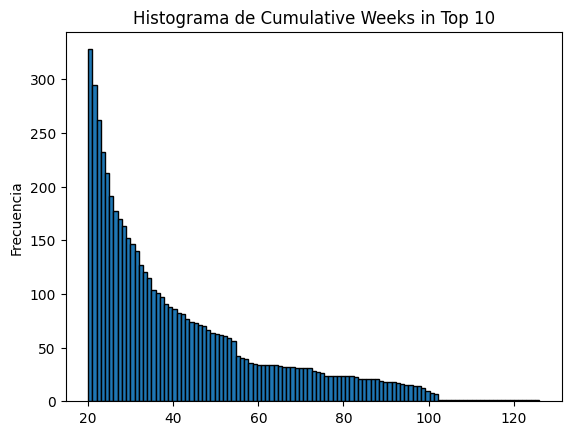

In [29]:
plt.hist(df_top['cumulative_weeks_in_top_10'], bins=len(df_top['cumulative_weeks_in_top_10'].unique()), edgecolor='black')
plt.title('Histograma de Cumulative Weeks in Top 10')
plt.ylabel('Frecuencia')
plt.show()

### Top shows

In [30]:
num_distintos, frecuencia = analizar_columna(df_top, 'show_title')

Número de valores distintos en 'show_title': 93

Frecuencia de cada valor en 'show_title':
show_title
Pablo Escobar, el patrón del mal    1051
Pasión de Gavilanes                  901
Yo soy Betty, la fea                 498
Café con aroma de mujer              426
Til Money Do Us Part                 214
                                    ... 
Man in Love                            1
Let's Open                             1
Love Like the Galaxy                   1
Queen of Tears                         1
Shrek 2                                1
Name: count, Length: 93, dtype: int64


93 títulos estuvieron más de 20 semanas en el top 10.

Vamos a ver cuáles fueron los 10 títulos que más semanas estuvieron en el top 10, diferenciado por país

In [31]:
grouped_df = df.groupby(['country_name', 'show_title'], as_index=False)['cumulative_weeks_in_top_10'].max()

sorted_df = grouped_df.sort_values(by='cumulative_weeks_in_top_10', ascending=False)

top_show_titles = sorted_df.head(10)

top_show_titles

,country_name,show_title,cumulative_weeks_in_top_10
74704,Pakistan,Money Heist,126
36215,Honduras,"Pablo Escobar, el patrón del mal",102
26409,El Salvador,"Pablo Escobar, el patrón del mal",102
70149,Nicaragua,"Pablo Escobar, el patrón del mal",102
111404,Venezuela,"Pablo Escobar, el patrón del mal",102
36224,Honduras,Pasión de Gavilanes,102
15772,Colombia,"Pablo Escobar, el patrón del mal",102
34991,Guatemala,"Pablo Escobar, el patrón del mal",101
24163,Ecuador,Pasión de Gavilanes,100
77172,Paraguay,"Pablo Escobar, el patrón del mal",100


Más semanas acumuladas en el top 10 sin tener en cuenta el país:

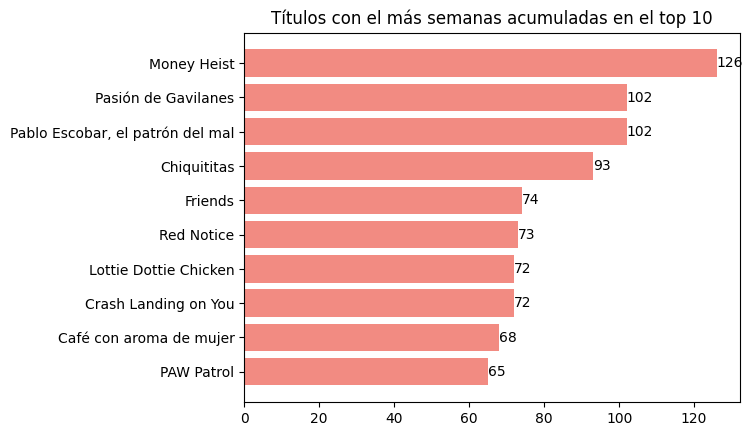

In [32]:
grouped_df = df.groupby(['show_title'], as_index=False)['cumulative_weeks_in_top_10'].max()

sorted_df = grouped_df.sort_values(by='cumulative_weeks_in_top_10', ascending=False)

top_show_titles = sorted_df.head(10)

plt.barh(top_show_titles['show_title'], top_show_titles['cumulative_weeks_in_top_10'], color='#F28B82')


for index, value in enumerate(top_show_titles['cumulative_weeks_in_top_10']):
    plt.text(value, index, str(value), va='center', ha='left', color='black')

plt.title('Títulos con el más semanas acumuladas en el top 10')
plt.gca().invert_yaxis()
plt.show()

Si en cambio contamos cuantas veces apareció cada título en el top 10 de cualquier país:

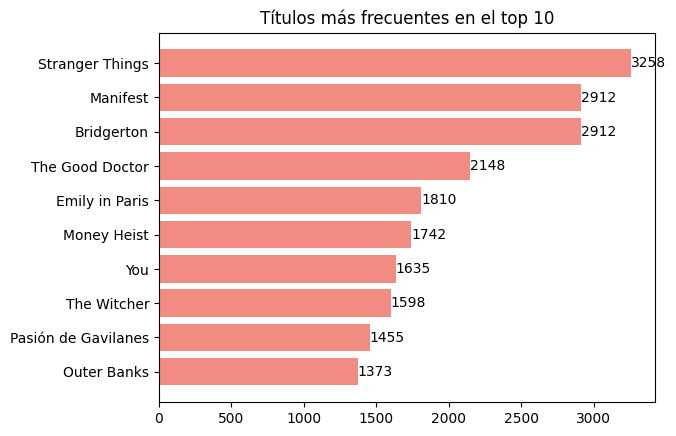

In [33]:
top_10_show_titles = df['show_title'].value_counts().head(10)

for index, value in enumerate(top_10_show_titles.values):
    plt.text(value, index, str(value), va='center', ha='left', color='black')

plt.barh(top_10_show_titles.index, top_10_show_titles.values, color='#F28B82')
plt.title('Títulos más frecuentes en el top 10')
plt.gca().invert_yaxis()
plt.show()

Vamos a ver si los títulos en el top 10 suelen ser globales o aislados por países

In [34]:
total_countries = df['country_name'].nunique()

countries_per_title = df.groupby('show_title')['country_name'].nunique().reset_index()

countries_per_title.columns = ['show_title', 'unique_country_count']

countries_per_title['%coverage'] = (countries_per_title['unique_country_count'] / total_countries) * 100

countries_per_title = countries_per_title.sort_values(by='unique_country_count', ascending=False)

countries_per_title.head(10)

,show_title,unique_country_count,%coverage
7213,The Royal Treatment,93,100.0
2122,Falling for Christmas,93,100.0
3832,Love Hard,93,100.0
7070,The Out-Laws,93,100.0
3880,Love at First Sight,93,100.0
3885,Love in the Villa,93,100.0
417,All of Us Are Dead,93,100.0
7028,The Night Agent,93,100.0
5888,Spiderhead,93,100.0
7005,The Mother,93,100.0


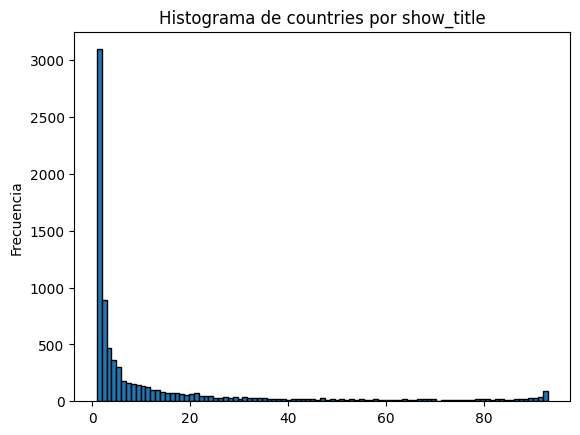

In [35]:
plt.hist(countries_per_title['unique_country_count'], bins=len(countries_per_title['unique_country_count'].unique()), edgecolor='black')
plt.title('Histograma de countries por show_title')
plt.ylabel('Frecuencia')
plt.show()

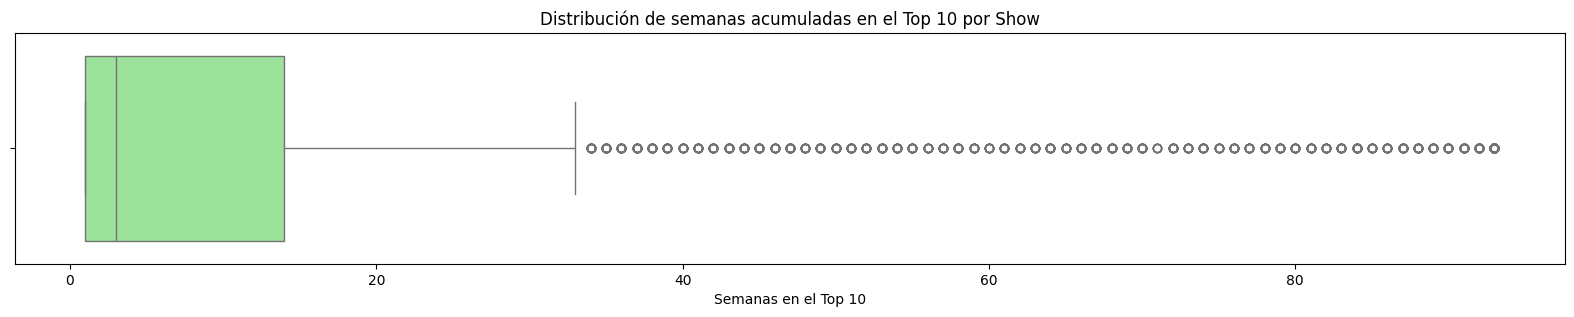

In [36]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=countries_per_title['unique_country_count'], color="lightgreen")
plt.title('Distribución de semanas acumuladas en el Top 10 por Show')
plt.xlabel('Semanas en el Top 10')
plt.show()

In [37]:
countries_per_title.describe().round(1)

,unique_country_count,%coverage
count,8293.0,8293.0
mean,13.6,14.6
std,22.6,24.3
min,1.0,1.1
25%,1.0,1.1
50%,3.0,3.2
75%,14.0,15.1
max,93.0,100.0


La media de los shows llega a estar en el top de 13.6 países. El 25% sólo en 1 país. Los que llegan a todos los países son outliers.

Veamos cómo se refleja esto cuando lo separamos por categorías.

In [38]:
df = df.merge(countries_per_title[['show_title', '%coverage']], on='show_title', how='left')

df.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10,%coverage
0,Argentina,AR,2024-10-27,Films,1,Don't Move,NaN,1,93.548387
1,Argentina,AR,2024-10-27,Films,2,Justice,NaN,2,81.720430
2,Argentina,AR,2024-10-27,Films,3,Family Pack,NaN,1,95.698925
3,Argentina,AR,2024-10-27,Films,4,The Shadow Strays,NaN,2,93.548387
4,Argentina,AR,2024-10-27,Films,5,Lonely Planet,NaN,3,90.322581


In [39]:
result = df.groupby('show_title').agg({
    'category': 'first',
    '%coverage': 'max'
}).reset_index()

result.head()

,show_title,category,%coverage
0,#AtFirstSight,Films,1.075269
1,#LadyRancho,Films,1.075269
2,#Manhole,Films,1.075269
3,"#Mom, I’m coming home",Films,1.075269
4,#NoFilter,TV,1.075269


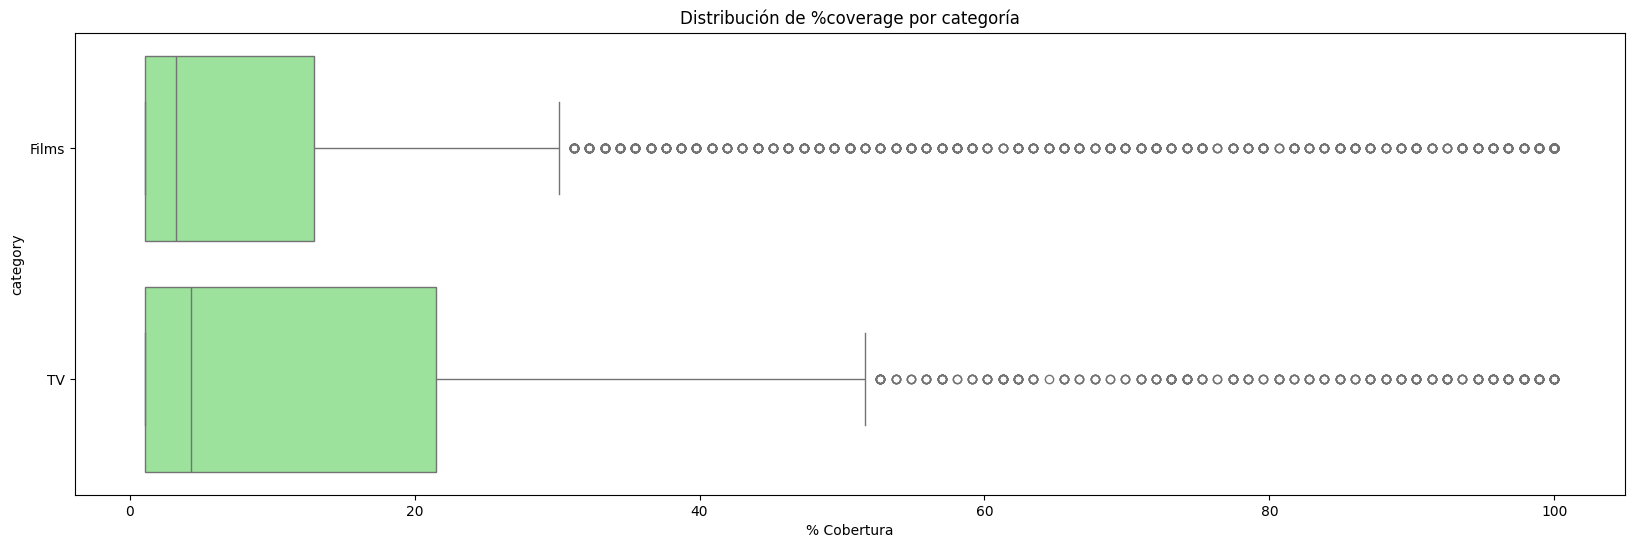

In [40]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=result, y='category', x='%coverage', color="lightgreen")

plt.title('Distribución de %coverage por categoría')
plt.xlabel('% Cobertura')

plt.show()

In [41]:
stats_by_category = result.groupby('category')['%coverage'].describe().round(1)

stats_by_category

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Films,6081.0,13.5,23.2,1.1,1.1,3.2,12.9,100.0
TV,2212.0,17.9,27.0,1.1,1.1,4.3,21.5,100.0


Como ya vimos, hay algunos títulos que llegan al top 10 en todos los países, pero son outliers.

Las series tienden a ser vistas en más países, con una media de casi 18, mientras que las películas tienen una media de 13,5 países.

Analizamos los shows que han llegado al top en todos los países:

In [42]:
df_top = df[df['%coverage'] == 100]

df_top = df_top.groupby('show_title').agg({
    'category': 'max',
    'cumulative_weeks_in_top_10': 'max',
    'weekly_rank': 'min',
    '%coverage': 'max'
}).reset_index()

df_top

,show_title,category,cumulative_weeks_in_top_10,weekly_rank,%coverage
0,3 Body Problem,TV,10,1,100.0
1,365 Days: This Day,Films,7,1,100.0
2,A Family Affair,TV,8,1,100.0
3,A Perfect Pairing,Films,5,1,100.0
4,AKA,Films,5,1,100.0
...,...,...,...,...,...
86,Uglies,Films,5,1,100.0
87,Under Paris,Films,13,1,100.0
88,We Have a Ghost,Films,6,1,100.0
89,Wednesday,TV,37,1,100.0


Series:

In [43]:
df_tv = df_top[df_top['category'] == 'TV']

df_tv = df_tv.sort_values(by='cumulative_weeks_in_top_10', ascending=False)

df_tv


,show_title,category,cumulative_weeks_in_top_10,weekly_rank,%coverage
14,Bridgerton,TV,45,1,100.0
30,Inventing Anna,TV,37,1,100.0
89,Wednesday,TV,37,1,100.0
57,Squid Game,TV,30,1,100.0
5,All of Us Are Dead,TV,28,1,100.0
73,The Night Agent,TV,27,1,100.0
59,Stranger Things,TV,24,1,100.0
83,The Witcher,TV,23,1,100.0
46,ONE PIECE,TV,19,1,100.0
20,Emily in Paris,TV,15,1,100.0


Películas:

In [44]:
df_films = df_top[df_top['category'] == 'Films']

df_films = df_films.sort_values(by='cumulative_weeks_in_top_10', ascending=False)

df_films


,show_title,category,cumulative_weeks_in_top_10,weekly_rank,%coverage
50,Red Notice,Films,73,1,100.0
6,Army of Thieves,Films,28,1,100.0
19,Don't Look Up,Films,19,1,100.0
62,The Adam Project,Films,16,1,100.0
64,The Gray Man,Films,16,1,100.0
...,...,...,...,...,...
67,The Killer,Films,4,1,100.0
8,Beckett,Films,3,1,100.0
44,Night Teeth,Films,3,1,100.0
29,Intrusion,Films,3,1,100.0
